In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [17]:
jfk_df = pd.read_csv("JFK-Flights.csv")

In [18]:
target = "DEP_DELAY"

In [19]:
jfk_df = jfk_df[jfk_df[target] > 60]

In [20]:
columns_to_exclude = ["TAIL_NUM", "CANCELLED", "CANCELLATION_REASON", "DIVERTED"]
jfk_df = jfk_df.drop(columns=[col for col in columns_to_exclude if col in jfk_df.columns], errors="ignore")

In [21]:
jfk_df = jfk_df.dropna()

In [22]:
categorical_cols = jfk_df.select_dtypes(include=["object", "category"]).columns
for col in categorical_cols:
    jfk_df[col] = jfk_df[col].astype(str)

In [23]:
X = pd.get_dummies(jfk_df.drop(columns=[target]), drop_first=True)
y = jfk_df[target]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
base_models = [
    ("lr", LinearRegression()),
    ("gb", GradientBoostingRegressor(random_state=42)),
    ("nn", MLPRegressor(max_iter=1000, random_state=42))
]
meta_model = RandomForestRegressor(random_state=42)
ensemble = StackingRegressor(estimators=base_models, final_estimator=meta_model)

In [26]:
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

In [27]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Results for Delays Over 1 Hour (All Features):")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2: {r2:.2f}")

Model Results for Delays Over 1 Hour (All Features):
RMSE: 47.39
MAE: 16.58
R^2: 0.84


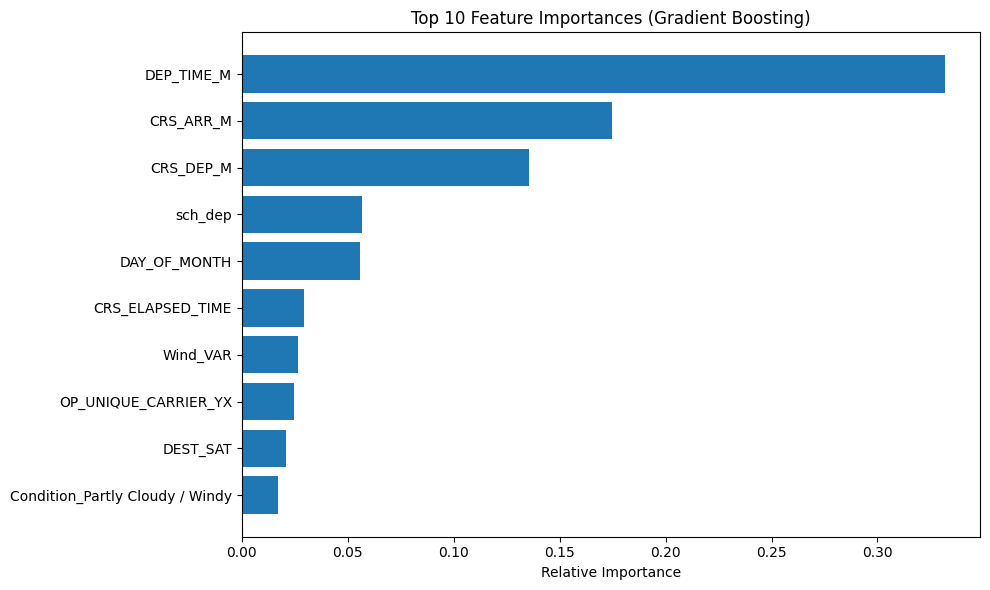

In [28]:
gb_model = ensemble.named_estimators_["gb"]
importances = gb_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances (Gradient Boosting)")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()